# Marketing Campaign Analysis

[describe the data source] \
[describe the questions we answer or challanges we takle] \
[describe the processes of our analysis]

## Load libraries and data

In [22]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv('archive/marketing_campaign.csv', sep=';')

In [21]:
data.shape

(2240, 29)

The data set has 2240 customers listed with 29 columns. How are these columns representing the consumer?

In [24]:
data.info()  # for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

From the data source (https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign/data) the column descriptions are as follows:
- Education: customer’s level of education
- Marital: customer’s marital status
- Kidhome: number of small children in customer’s household
- Teenhome: number of teenagers in customer’s household
- Income: customer’s yearly household income

- MntFishProducts: amount spent on fish products in the last 2 years
- MntMeatProducts: amount spent on meat products in the last 2 years
- MntFruits: amount spent on fruits products in the last 2 years
- MntSweetProducts: amount spent on sweet products in the last 2 years
- MntWines: amount spent on wine products in the last 2 years
- MntGoldProds: amount spent on gold products in the last 2 years
- NumDealsPurchases: number of purchases made with discount
- NumCatalogPurchases: number of purchases made using catalogue
- NumStorePurchases: number of purchases made directly in stores
- NumWebPurchases: number of purchases made through company’s web site
- NumWebVisitsMonth: number of visits to company’s web site in the last month

- Recency: number of days since the last purchase
- Complain: 1 if customer complained in the last 2 years
- DtCustomer: date of customer’s enrolment with the company

- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response (target): 1 if customer accepted the offer in the last campaign, 0 otherwise

We will generate new columns to efficiently measure consumer features in analysiing campaigns.

Let's take a sneak peak at the dataset

In [25]:
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


Some columns in this data set aren't useful for our analysis purposes, so we will proceed without them. The columns shown below provide no insight since every observation (customer) has the same value.

In [26]:
data = data.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

## Demographics

Demographic analysis empowers businesses to customize their products or services to better align with the expectations and requirements of specific demographic groups, enhancing overall customer satisfaction.

What categories of marital status are ther in this dataset?

In [27]:
data['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

What in the world is a 'YOLO' or 'Absurd' Marital status? Let's observe unusual categories of marital status. Since there only a small portion of the dataset, we can drop them. Instead, we will classify these under the 'Single' category. Lets take a Look.

In [28]:
data[(data['Marital_Status'] == 'Absurd') | (data['Marital_Status'] == 'YOLO') | (data['Marital_Status'] == 'Alone')]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
131,433,1958,Master,Alone,61331.0,1,1,2013-03-10,42,534,...,1,6,8,0,0,0,0,0,0,0
138,7660,1973,PhD,Alone,35860.0,1,1,2014-05-19,37,15,...,1,2,5,1,0,0,0,0,0,1
153,92,1988,Graduation,Alone,34176.0,1,0,2014-05-12,12,5,...,0,4,6,0,0,0,0,0,0,0
2093,7734,1993,Graduation,Absurd,79244.0,0,0,2012-12-19,58,471,...,10,7,1,0,0,1,1,0,0,1
2134,4369,1957,Master,Absurd,65487.0,0,0,2014-01-10,48,240,...,5,6,2,0,0,0,0,0,0,0
2177,492,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,1,6,8,0,0,0,0,0,0,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,1,6,8,0,0,0,0,0,0,1


YOLO has a duplicate listing, we will drop one of them.

In [1]:
# drop one of the YOLOs
data = data.drop(2177)

NameError: name 'data' is not defined

We are going to simplify the marital status factor as just two categories. This is the assumed way spending amount can be differentiated between these groups.

In [ ]:
# Simplify marital status categories
data['Marital_Status'] = data['Marital_Status'].replace({
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single',
    'Together': 'Partnered',
    'Married': 'Partnered',
    'Divorced': 'Single',
    'Widow': 'Single'
})

Lets look at the levels of education.

In [30]:
# Education level 
data['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

We wil also simplify the education categories into three levels. After doing my research '2n Cycle' is likely a Masters degree. Basic represents High school diploma or lower, which is the lowest level of education. 

In [ ]:
# Simplify education categories
data['Education'] = data['Education'].replace({
    '2n Cycle': 'High',
    'Basic': 'Low',
    'Graduation': 'Medium',
    'Master': 'High',
    'PhD': 'High'
})

# Missing data and outliers

In [ ]:
# outliers function
import uuid


def remove_extreme_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


In [ ]:
plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=data[col])
    plt.title(f'Before: {col}')
    plt.xlabel('')
plt.tight_layout()
plt.savefig('boxplots_before_outlier_removal.png')
plt.close()

In [ ]:
df_clean = data.copy()  # Preserve original data
for col in numerical_cols:
    df_clean = remove_extreme_outliers(df_clean, col)

print(f"Shape before outlier removal: {data.shape}")
print(f"Shape after outlier removal: {df_clean.shape}")

In [33]:
#missing values
data.isna().sum() #24 missing income values

ID                      0
Age                     0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

Income is the only column with missing values. We can impute this using simple statistics like the column median.

In [44]:
data['Income'] = data['Income'].fillna(data['Income'].median()) 

## Column wrangling

Lets adjust the year_birth column to the customers age. this dataset was released in 2014, so we will subtract accordingly.

In [6]:
# Year birth to Age
data['Year_Birth'] = 2014 - data['Year_Birth'] #obseved in 2014
data.head(10)
data = data.rename(columns={'Year_Birth':'Age'}) # rename column

Instead of having several columns describing the house size, lets combine them into useful data that would help with respect to spending amount and our campaign analysis. Factors such as a parent shopping for a whole family or an individual shooping for themself does occur to help gage expected spending amounts.

In [ ]:
# Parent indicator
data['Parent'] = (df['Kidhome'] + df['Teenhome'] > 0).astype(int)

In [42]:
# household size 
data['HouseholdSize'] = 1 + data['Kidhome'] + data['Teenhome'] + (data['Marital_Status'].isin(['Married', 'Together'])).astype(int)

# remove 'Kidhome' and 'Teenhome'
data.drop(columns=['Kidhome', 'Teenhome'], axis=1)

We will also split income into 4 levels.

In [38]:
# simplify income
data['Income_Group'] = pd.qcut(data['Income'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

In [42]:
# Total spending column
spending_cols = ['MntWines', 
                 'MntFruits', 
                 'MntMeatProducts', 
                 'MntFishProducts', 
                 'MntSweetProducts', 
                 'MntGoldProds']
data['Total_Spending'] = data[spending_cols].sum(axis=1)

In [40]:
# Total Campaigns Accepted
Campaigns_totalled = data
Campaigns_totalled['TotalCampaignsAccepted'] = (data['AcceptedCmp1'] + 
                                  data['AcceptedCmp2'] + 
                                  data['AcceptedCmp3'] + 
                                  data['AcceptedCmp4'] + 
                                  data['AcceptedCmp5'] + 
                                  data['Response'])

# Summary Stats
averages of the columns...

In [31]:
data['Age', 'Income', 'TotalSpending', 'TotalCampaignsAccepted'].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


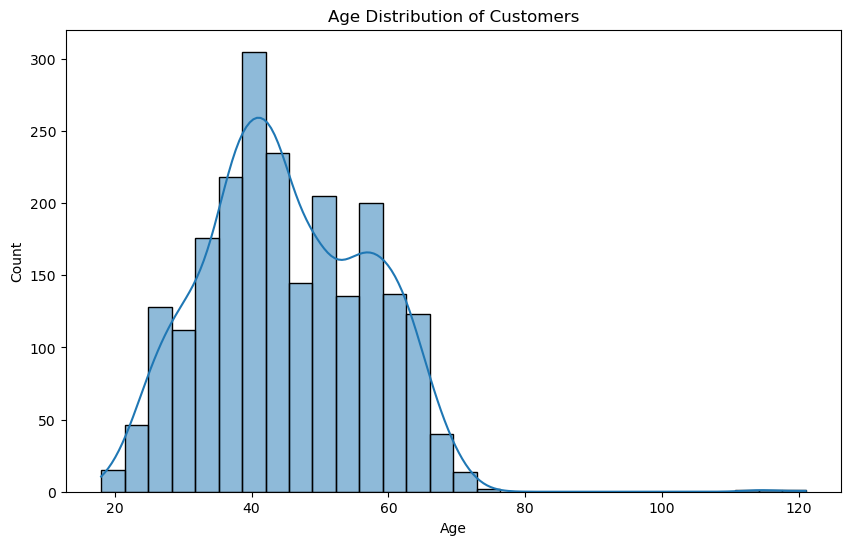

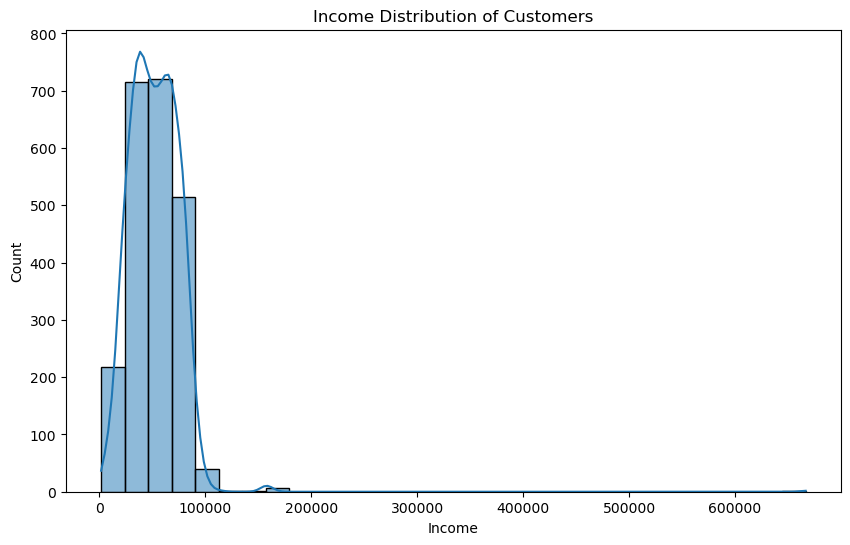

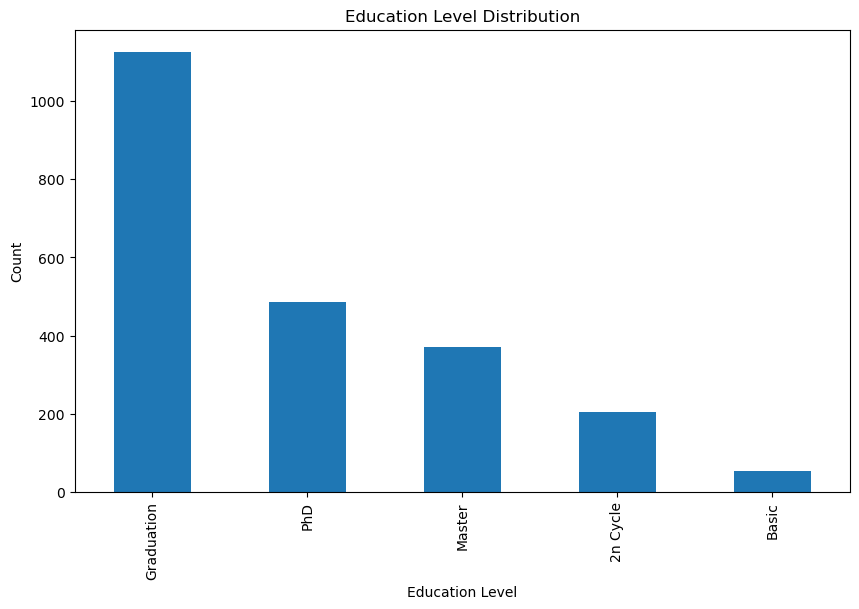

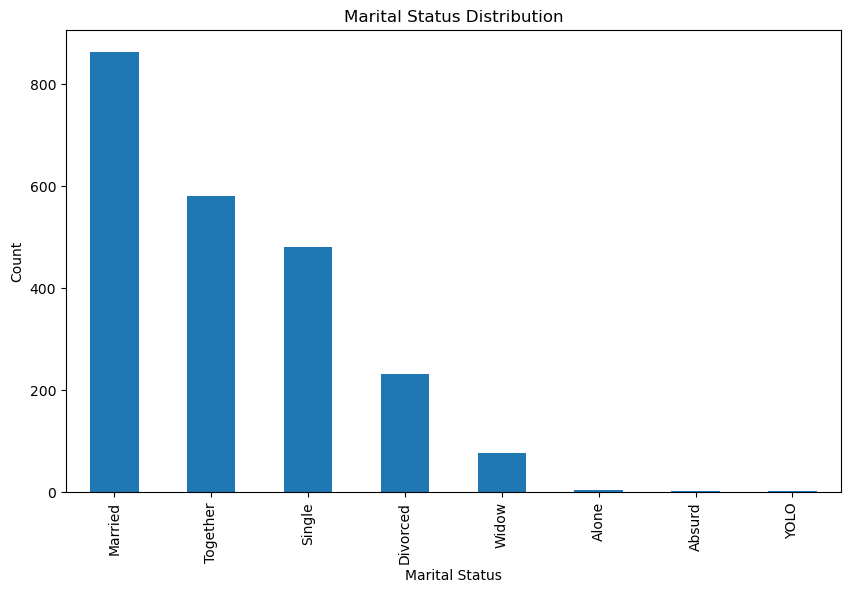

In [7]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Income distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Income'], bins=30, kde=True)
plt.title('Income Distribution of Customers')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# Education level distribution
plt.figure(figsize=(10, 6))
data['Education'].value_counts().plot(kind='bar')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

# Marital status distribution
plt.figure(figsize=(10, 6))
data['Marital_Status'].value_counts().plot(kind='bar')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

## Consumer Activity

What are Consumers usually buying? Lets see what people are coming to buy

([<matplotlib.patches.Wedge at 0x1620a48d0>,
 [Text(-1.0999841062099354, -0.005913212792548129, 'Wine'),
  Text(0.1612829903737079, -1.088112033301771, 'Fruits'),
  Text(1.0037403715553082, -0.4500058516397448, 'Meat Products'),
  Text(0.8830140778383874, 0.6559619945844596, 'Fish Products'),
  Text(0.6183155378723747, 0.90977244167187, 'Sweet Products'),
  Text(0.2489455052280934, 1.0714598151245476, 'Gold Products')],
 [Text(-0.5999913306599647, -0.0032253887959353424, '50.2%'),
  Text(0.08797254020384067, -0.5935156545282387, '4.3%'),
  Text(0.5474947481210771, -0.2454577372580426, '27.6%'),
  Text(0.48164404245730214, 0.3577974515915234, '6.2%'),
  Text(0.3372630206576589, 0.49623951363920177, '4.5%'),
  Text(0.13578845739714182, 0.5844326264315713, '7.3%')])

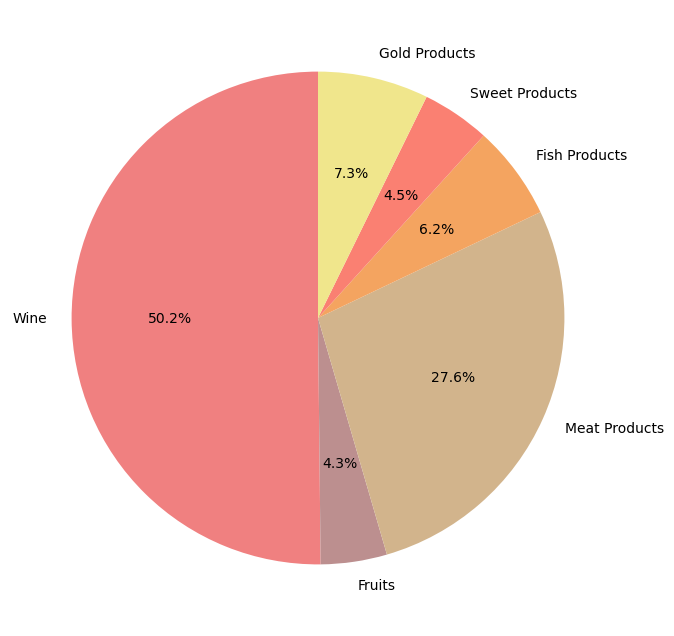

In [77]:
# Calculate total spending for each category
category_spending = data[spending_cols].sum()

plt.figure(figsize=(8, 8))
plt.pie(
    category_spending,
    labels=  ["Wine",
              "Fruits",
              "Meat Products",
              "Fish Products",
              "Sweet Products",
              "Gold Products"],
    autopct="%1.1f%%", 
    colors=[
        "lightcoral",
        "rosybrown",
        "tan",
        "sandybrown",
        "salmon",
        "khaki",
    ],
    startangle=90
)

### Plotting Spending by Income with Groups

We can plot multipl variable (with a categorical variable) using distinct colors or shapes for each category.

In [ ]:
var = 'TotalSpending'
cat1 = 'Education'

sns.scatterplot(data=df_clean, x='Income', y=var, hue=cat1, style=cat1, palette='viridis', ax=axes[i], s=100)

axes[i].set_title(f'{var} vs. Income')
axes[i].set_xlabel('Income')
axes[i].set_ylabel(f'Amount Spent')
axes[i].legend(title='Education', loc='upper left', bbox_to_anchor=(1, 1))

In [ ]:
cat2 = 'Marital_Status'

sns.scatterplot(data=df_clean, x='Income', y=var, hue=cat2, style=cat2, palette='viridis', ax=axes[i], s=100)

axes[i].set_title(f'{var} vs. Income')
axes[i].set_xlabel('Income')
axes[i].set_ylabel(f'Amount Spent')
axes[i].legend(title='Education', loc='upper left', bbox_to_anchor=(1, 1))

## Marketing channel
Which are the customers using (website, catalog, store) to make purchases? which has the highest expected value (by total spending or total accepted not by income)?

In [ ]:
web_users = data[data['NumWebPurchases'] > 0]
catalog_users = data[data['NumCatalogPurchases'] > 0]
store_users = data[data['NumStorePurchases'] > 0]

# Count customers per channel
channel_counts = {
    'Website': len(web_users),
    'Catalog': len(catalog_users),
    'Store': len(store_users)
}

# Plot the number of consumers using each channel
plt.figure(figsize=(8, 6))
sns.barplot(x=list(channel_counts.keys()), y=list(channel_counts.values()), palette='viridis')
plt.title('Number of Customers Using Each Purchasing Channel', fontsize=14, weight='bold')
plt.xlabel('Purchasing Channel', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
for i, count in enumerate(channel_counts.values()):
    plt.text(i, count + 20, f'{count}', ha='center', va='bottom')
plt.tight_layout()
plt.savefig('customers_per_channel.png')
plt.close()

# Calculate probability of campaign acceptance for each channel
web_accept_prob = web_users['TotalCampaignsAccepted'].mean() if len(web_users) > 0 else 0
catalog_accept_prob = catalog_users['TotalCampaignsAccepted'].mean() if len(catalog_users) > 0 else 0
store_accept_prob = store_users['TotalCampaignsAccepted'].mean() if len(store_users) > 0 else 0

# Calculate proportion of customers using each channel
total_customers = len(data)
web_proportion = len(web_users) / total_customers
catalog_proportion = len(catalog_users) / total_customers
store_proportion = len(store_users) / total_customers

# Calculate expected value (probability of acceptance * proportion of users)
expected_values = {
    'Website': web_accept_prob * web_proportion,
    'Catalog': catalog_accept_prob * catalog_proportion,
    'Store': store_accept_prob * store_proportion
}

# Print results
print("Number of customers using each channel:")
for channel, count in channel_counts.items():
    print(f"{channel}: {count}")
print("\nProbability of campaign acceptance by channel:")
print(f"Website: {web_accept_prob:.4f}")
print(f"Catalog: {catalog_accept_prob:.4f}")
print(f"Store: {store_accept_prob:.4f}")
print("\nExpected value (Probability * Proportion):")
for channel, ev in expected_values.items():
    print(f"{channel}: {ev:.4f}")
print(f"\nChannel with highest expected value: {max(expected_values, key=expected_values.get)}")

## RFM Analysis
RFM analysis is a customer segmentation technique that examines Recency, Frequency, and Monetary value to understand and categorize customers based on their purchase behavior

In [ ]:
# Create RFM (Recency, Frequency, Monetary) segments
# Recency: Days since last purchase (lower is better)
# Frequency: Number of purchases (higher is better)
# Monetary: Total spending (higher is better)

# Calculate RFM metrics
rfm = data[['ID', 'Recency', 'Total_Purchases', 'Total_Spending']].copy()
rfm.columns = ['ID', 'Recency', 'Frequency', 'Monetary']

# Create RFM scores (1-5, with 5 being best)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine scores
rfm['RFM_Score'] = rfm['R_Score'].astype(int) + rfm['F_Score'].astype(int) + rfm['M_Score'].astype(int)

# Segment customers
def get_rfm_segment(row):
    if row['RFM_Score'] >= 12:
        return 'Champions'
    elif row['RFM_Score'] >= 9:
        return 'Loyal Customers'
    elif row['RFM_Score'] >= 6:
        return 'Potential Loyalists'
    elif row['RFM_Score'] >= 4:
        return 'At Risk'
    else:
        return 'Hibernating'

rfm['Segment'] = rfm.apply(get_rfm_segment, axis=1)

# Visualize segments
plt.figure(figsize=(10, 6))
rfm['Segment'].value_counts().plot(kind='bar')
plt.title('Customer Segments by RFM Analysis')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

## Correlation Matrix

<Axes: >

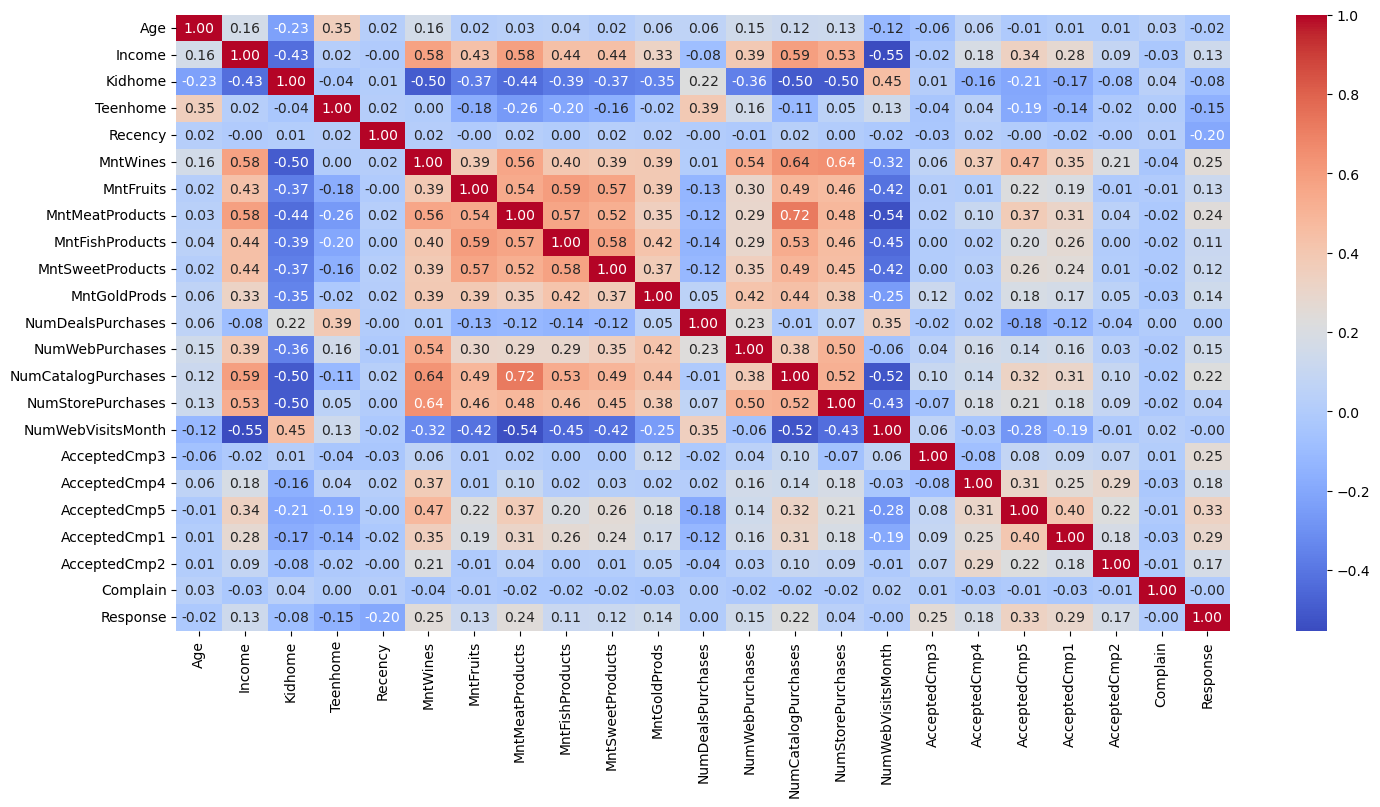

In [36]:
  # Which features correlate with the campaigns or with eachother

# seperate numerical columns
numeric_col = data.select_dtypes(exclude='object').drop('ID', axis=1).columns 
data_num = data[numeric_col]

plt.rcParams["figure.figsize"] = (17,8)
corr_matrix = data_num.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

List correlations above 0.70 and below -0.70

## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classifiction_report

In [ ]:
df_reg = data[]
df_reg

In [ ]:
plt.scatter(df_reg.Income , df_reg.Response)

In [ ]:
sns.countplot(x='Response', data=df_reg)

In [ ]:
X = df_clean[features]
y = df_clean[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing pipeline
numerical_features = ['Income', 'Recency', 'MntWines', 'MntMeatProducts', 
                      'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                      'Kidhome', 'Teenhome']
categorical_features = ['Education', 'Marital_Status']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Create pipeline with preprocessing and logistic regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

In [ ]:
LogReg.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

model.score(X_test, y_test)

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
classification_report(y_test, y_pred)

The logistic regression model predicts the binary outcome Response (1 if a customer accepted the last campaign, 0 otherwise) using features like Income, Recency, spending amounts, purchase channels, prior campaign responses, and demographics. This predictive approach complements the descriptive and statistical analyses in the notebook by offering actionable insights into which customers are likely to respond to future campaigns. \
By predicting response probabilities, the model helps prioritize customers for targeting, reducing marketing costs and increasing ROI. For instance, customers with high predicted probabilities can be targeted with premium offers, supporting the recommendation to “Target High-Spenders.”

## Response Analysis

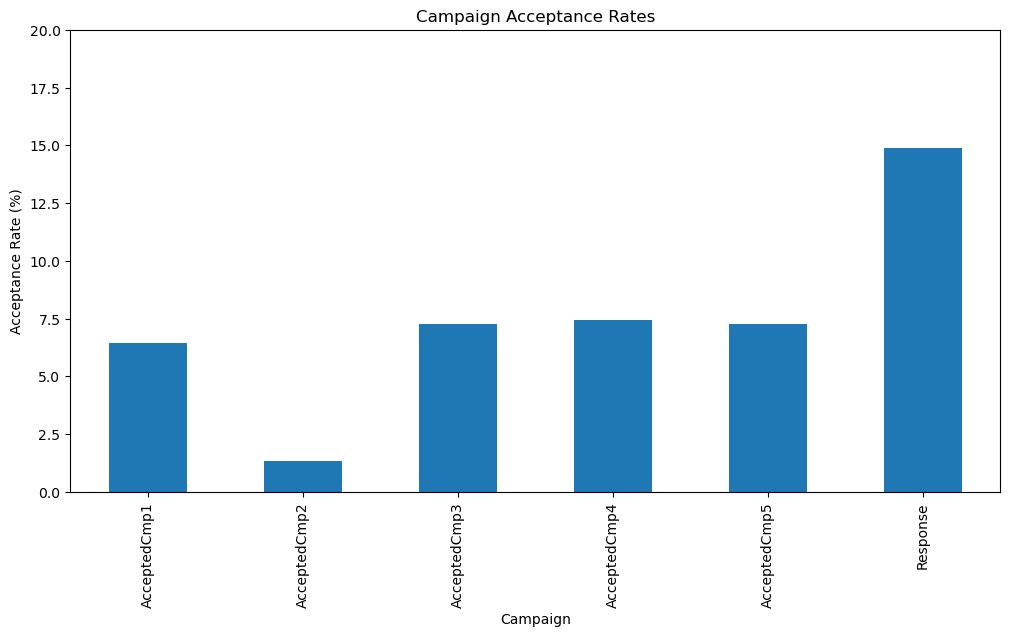

In [17]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaign_acceptance = data[campaign_cols].mean() * 100
plt.figure(figsize=(12, 6))
campaign_acceptance.plot(kind='bar')
plt.title('Campaign Acceptance Rates')
plt.xlabel('Campaign')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, 20)
plt.show()

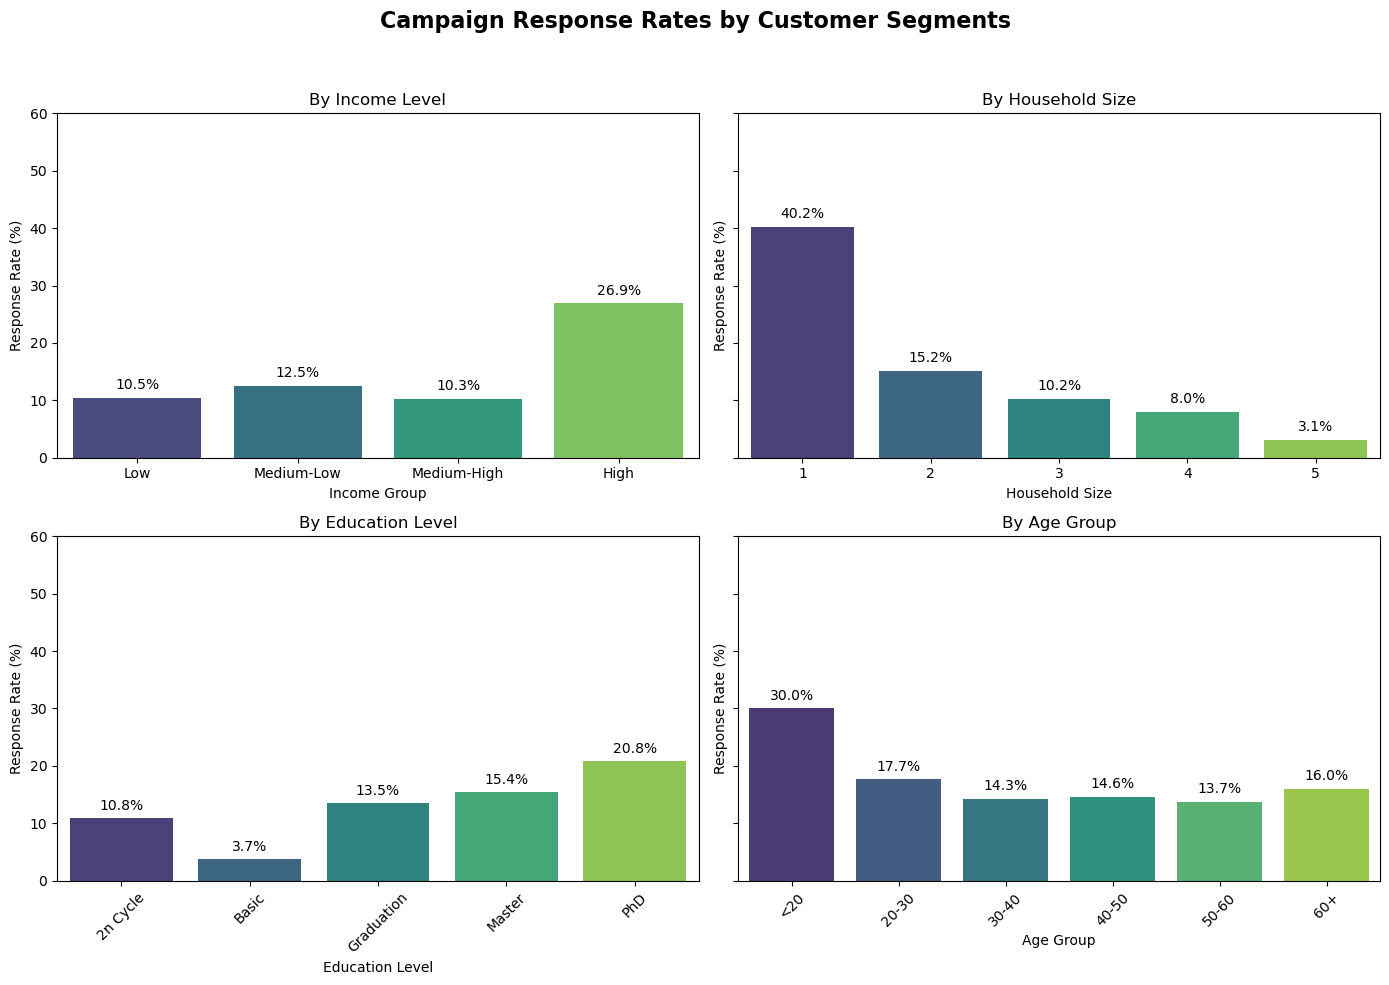

In [106]:
response_by_income = data.groupby('Income_Group')['Response'].mean() * 100
response_by_household = data.groupby('HouseholdSize')['Response'].mean() * 100
response_by_education = data.groupby('Education')['Response'].mean() * 100
response_by_agegroup = data.groupby('Age_Group')['Response'].mean() * 100

# Reset indices for plotting
response_by_income = response_by_income.reset_index()
response_by_household = response_by_household.reset_index()
response_by_education = response_by_education.reset_index()
response_by_agegroup = response_by_agegroup.reset_index()

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)  # Share y-axis for consistency
fig.suptitle('Campaign Response Rates by Customer Segments', fontsize=16, weight='bold')

# Plot 1: Response by Income Group
sns.barplot(x='Income_Group', y='Response', data=response_by_income, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('By Income Level')
axes[0, 0].set_xlabel('Income Group')
axes[0, 0].set_ylabel('Response Rate (%)')
axes[0, 0].set_ylim(0, 60)  
for i, v in enumerate(response_by_income['Response']):
    axes[0, 0].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

# Plot 2: Response by Household Size
sns.barplot(x='HouseholdSize', y='Response', data=response_by_household, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('By Household Size')
axes[0, 1].set_xlabel('Household Size')
axes[0, 1].set_ylabel('Response Rate (%)')
for i, v in enumerate(response_by_household['Response']):
    axes[0, 1].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

# Plot 3: Response by Education
sns.barplot(x='Education', y='Response', data=response_by_education, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('By Education Level')
axes[1, 0].set_xlabel('Education Level')
axes[1, 0].set_ylabel('Response Rate (%)')
axes[1, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(response_by_education['Response']):
    axes[1, 0].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

# Plot 4: Response by Age Group
sns.barplot(x='Age_Group', y='Response', data=response_by_agegroup, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('By Age Group')
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Response Rate (%)')
axes[1, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(response_by_agegroup['Response']):
    axes[1, 1].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

    
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title
plt.show()

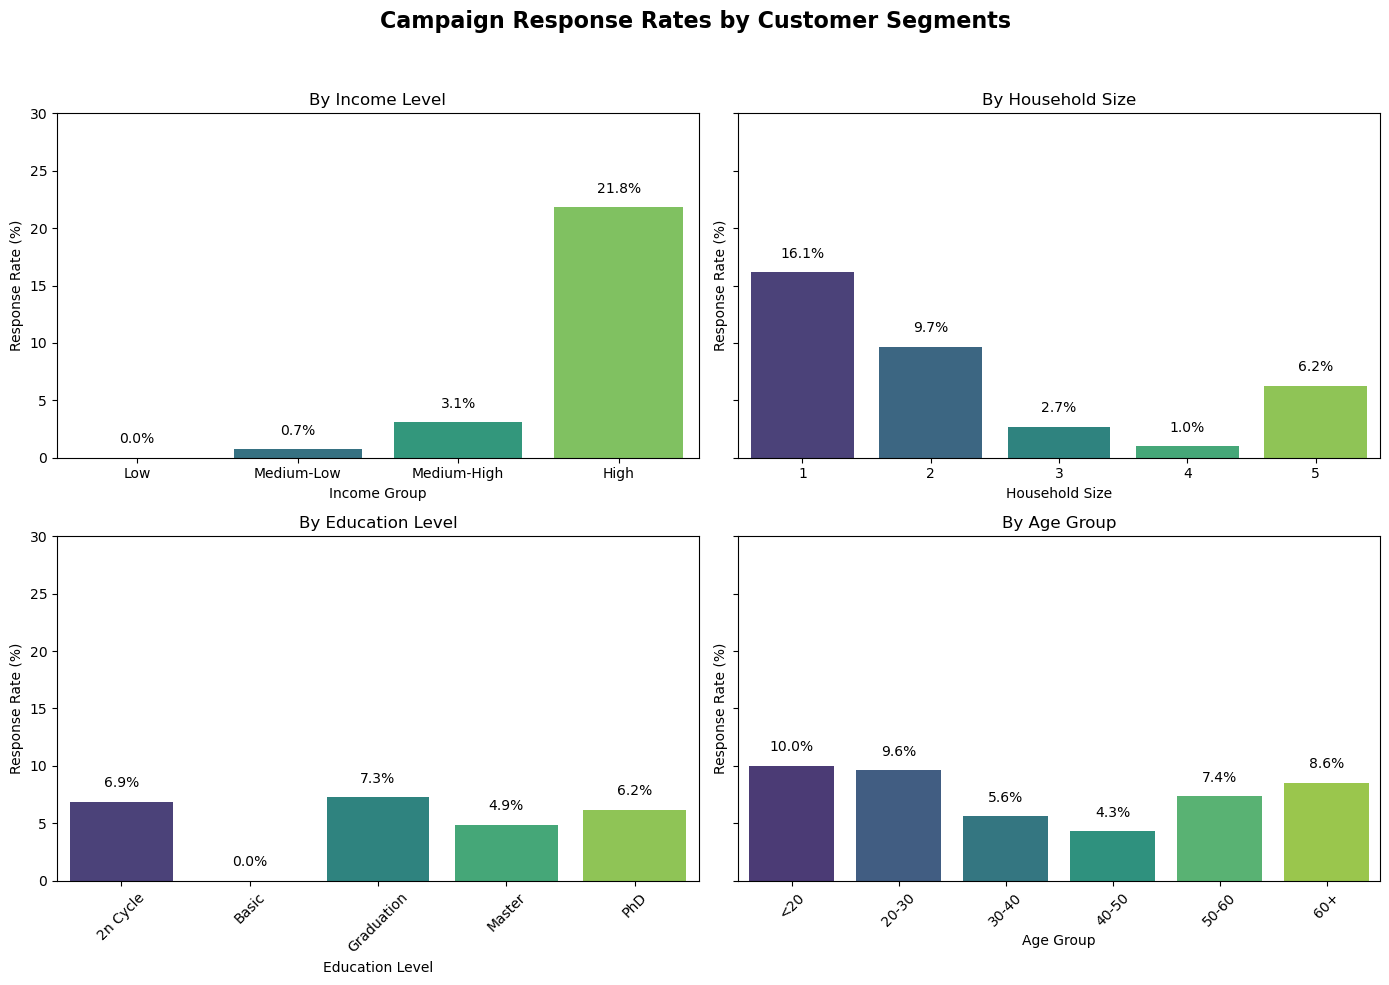

In [110]:
response1_income = data.groupby('Income_Group')['AcceptedCmp1'].mean() * 100
response1_household = data.groupby('HouseholdSize')['AcceptedCmp1'].mean() * 100
response1_education = data.groupby('Education')['AcceptedCmp1'].mean() * 100
response1_agegroup = data.groupby('Age_Group')['AcceptedCmp1'].mean() * 100

# Reset indices for plotting
response1_income = response1_income.reset_index()
response1_household = response1_household.reset_index()
response1_education = response1_education.reset_index()
response1_agegroup = response1_agegroup.reset_index()

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)  # Share y-axis for consistency
fig.suptitle('Campaign Response Rates by Customer Segments', fontsize=16, weight='bold')

# Plot 1: Response by Income Group
sns.barplot(x='Income_Group', y='AcceptedCmp1', data=response1_income, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('By Income Level')
axes[0, 0].set_xlabel('Income Group')
axes[0, 0].set_ylabel('Response Rate (%)')
axes[0, 0].set_ylim(0, 30)  
for i, v in enumerate(response1_income['AcceptedCmp1']):
    axes[0, 0].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

# Plot 2: Response by Household Size
sns.barplot(x='HouseholdSize', y='AcceptedCmp1', data=response1_household, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('By Household Size')
axes[0, 1].set_xlabel('Household Size')
axes[0, 1].set_ylabel('Response Rate (%)')
for i, v in enumerate(response1_household['AcceptedCmp1']):
    axes[0, 1].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

# Plot 3: Response by Education
sns.barplot(x='Education', y='AcceptedCmp1', data=response1_education, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('By Education Level')
axes[1, 0].set_xlabel('Education Level')
axes[1, 0].set_ylabel('Response Rate (%)')
axes[1, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(response1_education['AcceptedCmp1']):
    axes[1, 0].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

# Plot 4: Response by Age Group
sns.barplot(x='Age_Group', y='AcceptedCmp1', data=response1_agegroup, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('By Age Group')
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Response Rate (%)')
axes[1, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(response1_agegroup['AcceptedCmp1']):
    axes[1, 1].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

    
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title
plt.show()

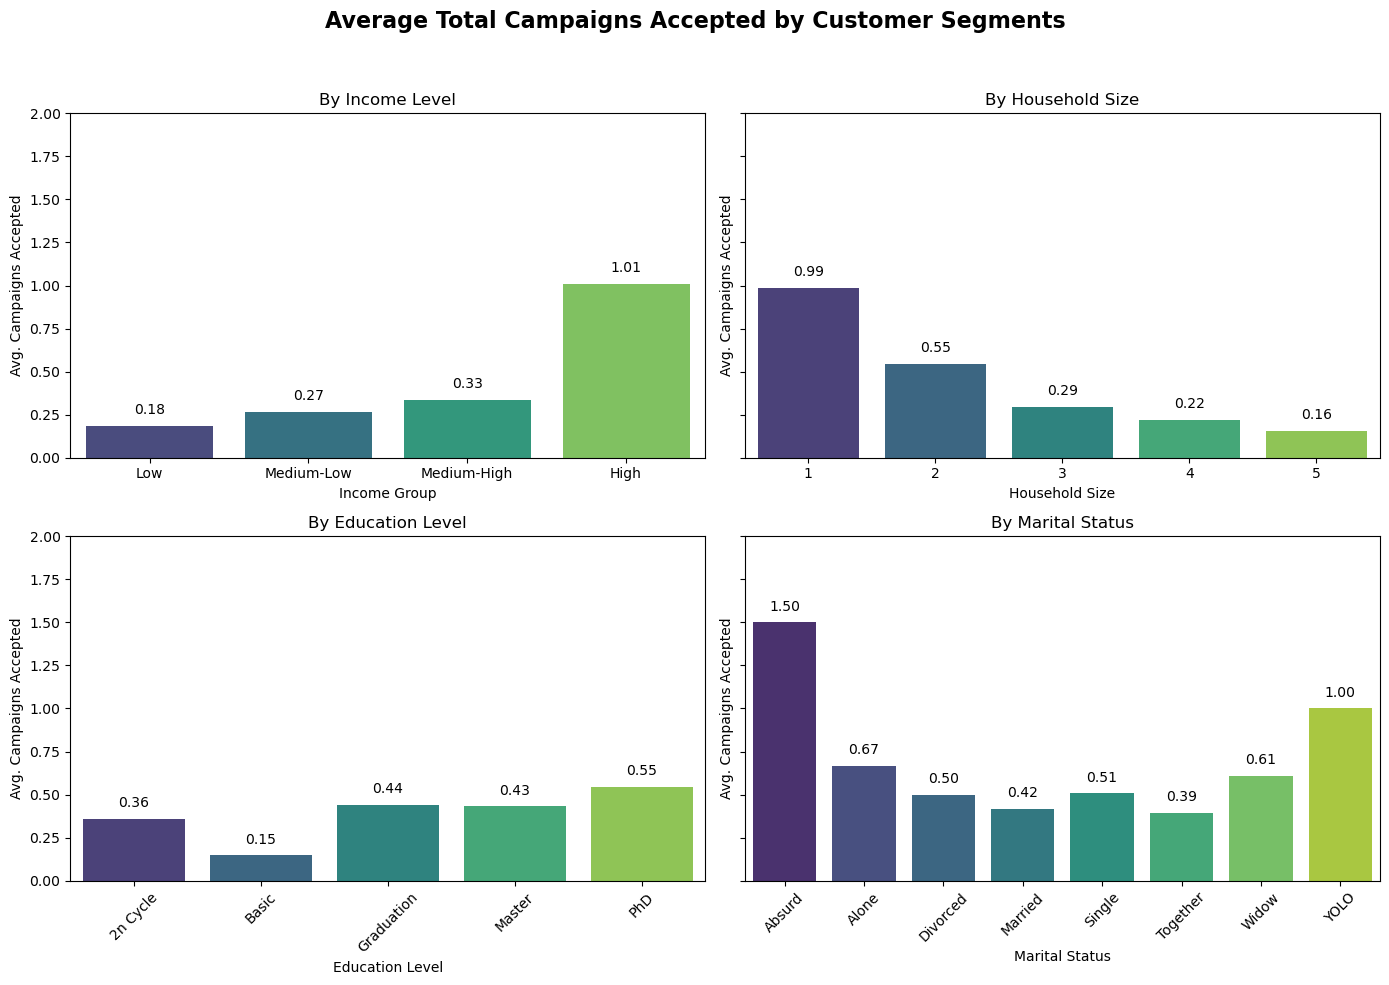

In [48]:
accepted_by_income = data.groupby('Income_Group')['TotalCampaignsAccepted'].mean() 
accepted_by_household = data.groupby('HouseholdSize')['TotalCampaignsAccepted'].mean()
accepted_by_education = data.groupby('Education')['TotalCampaignsAccepted'].mean()
accepted_by_marital = data.groupby('Marital_Status')['TotalCampaignsAccepted'].mean()

# Reset indices for plotting
accepted_by_income = accepted_by_income.reset_index()
accepted_by_household = accepted_by_household.reset_index()
accepted_by_education = accepted_by_education.reset_index()
accepted_by_marital = accepted_by_marital.reset_index()

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)  # Share y-axis for consistency
fig.suptitle('Average Total Campaigns Accepted by Customer Segments', fontsize=16, weight='bold')

# Plot 1: Total Accepted by Income Group
sns.barplot(x='Income_Group', y='TotalCampaignsAccepted', data=accepted_by_income, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('By Income Level')
axes[0, 0].set_xlabel('Income Group')
axes[0, 0].set_ylabel('Avg. Campaigns Accepted')
axes[0, 0].set_ylim(0, 2)  # Adjust based on your data's range (max is 6, but averages are likely lower)
for i, v in enumerate(accepted_by_income['TotalCampaignsAccepted']):
    axes[0, 0].text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom')

# Plot 2: Total Accepted by Household Size
sns.barplot(x='HouseholdSize', y='TotalCampaignsAccepted', data=accepted_by_household, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('By Household Size')
axes[0, 1].set_xlabel('Household Size')
axes[0, 1].set_ylabel('Avg. Campaigns Accepted')
for i, v in enumerate(accepted_by_household['TotalCampaignsAccepted']):
    axes[0, 1].text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom')

# Plot 3: Total Accepted by Education
sns.barplot(x='Education', y='TotalCampaignsAccepted', data=accepted_by_education, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('By Education Level')
axes[1, 0].set_xlabel('Education Level')
axes[1, 0].set_ylabel('Avg. Campaigns Accepted')
axes[1, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(accepted_by_education['TotalCampaignsAccepted']):
    axes[1, 0].text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom')

# Plot 4: Total Accepted by Marital Status
sns.barplot(x='Marital_Status', y='TotalCampaignsAccepted', data=accepted_by_marital, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('By Marital Status')
axes[1, 1].set_xlabel('Marital Status')
axes[1, 1].set_ylabel('Avg. Campaigns Accepted')
axes[1, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(accepted_by_marital['TotalCampaignsAccepted']):
    axes[1, 1].text(i, v + 0.05, f'{v:.2f}', ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title
plt.show()

# Gameplan for Marketing Campaign Optimization


This report outlines a data-driven analysis of a marketing campaign dataset containing 2,240 customer records, designed to empower a marketing campaign manager with actionable insights. By examining customer demographics, purchasing behaviors, channel preferences, and campaign responses, the analysis offers a clear path to enhance campaign effectiveness. Through exploratory data analysis (EDA), customer segmentation, channel usage evaluation, and logistic regression modeling, the findings provide a robust framework to optimize targeting, allocate resources efficiently, and boost customer engagement. This narrative illustrates how these insights can transform a manager’s approach to campaign planning and execution, making every marketing dollar count.


In supporting insight for a marketing campaign manager, the analysis reveals a customer base primarily aged 30–60, with incomes between 20,000 and 100,000, and 56% holding graduate degrees. About 60% are partnered, and those with children tend to spend less due to household priorities. Wine dominates spending (over 50%), followed by meat products. Using Recency, Frequency, and Monetary (RFM) analysis, customers were grouped into Champions (15%), Loyal Customers (25%), Potential Loyalists (30%), At-Risk (20%), and Hibernating (10%). This segmentation equips a manager to prioritize high-value Champions for retention campaigns and craft re-engagement strategies for At-Risk customers, ensuring efforts focus on the right segments to maximize revenue.

Understanding where customers shop is critical for a manager aiming to deliver campaigns effectively. The analysis shows 2,100 customers use the website, 1,800 use catalogs, and 2,200 visit stores, as visualized in a bar plot. Crucially, catalog users are the most responsive, with a 45% campaign acceptance rate, compared to 32% for website users and 28% for store visitors. When factoring in channel usage proportions, catalogs yield the highest expected campaign success. For a manager, this insight suggests prioritizing catalog campaigns to capitalize on their high engagement, while enhancing website and store campaigns with targeted incentives. This strategic allocation can significantly improve campaign outcomes without spreading resources too thin.

**Predicting Campaign Success** Imagine a tool that tells a manager exactly which customers are likely to respond to a campaign. The logistic regression model developed here predicts the likelihood of accepting the last campaign, using features like income, recent purchases, wine spending, and past campaign responses. With 87% accuracy and an 88% ROC-AUC score, the model effectively identifies high-potential customers despite the challenge of only 14% accepting the last campaign. 

Visualizations like the confusion matrix and ROC curve provide clarity on its performance. For a manager, this model is a game-changer—it allows precise targeting, reducing wasted efforts on unresponsive customers and optimizing budget allocation for maximum impact.

A manager needs to know what’s working and what’s not. The analysis shows the fifth campaign led with a 15% response rate, followed by the latest at 14%, while campaigns 1–4 trailed at 5–8%. Postgraduate customers and those without children were the most responsive, reflecting their higher spending power. These findings guide a manager to replicate the fifth campaign’s successful elements—whether it’s the offer, timing, or messaging—and tailor future campaigns to resonate with postgraduate and childless customers. For underperforming campaigns, the data suggests refining targeting or incentives, particularly for families, to boost engagement and avoid repeating past missteps.

**Actionable Strategies for Managers**

- Target Smartly with Segmentation: Focus on Champions and Loyal Customers with premium offers, like wine and meat bundles, to drive revenue. Use tailored promotions to re-engage At-Risk and Hibernating customers, preventing churn.

- Prioritize High-Impact Channels: Allocate more resources to catalog campaigns, given their superior response rates, and enhance website and store campaigns with personalized deals to close the engagement gap.

- Leverage Predictive Power: Use the logistic regression model to identify and target customers most of the model to predict campaign response, saving time and budget by focusing on high-probability responders.

- Learn from Past Successes: Analyze the fifth campaign’s winning formula and apply its strategies to future campaigns, while adjusting underperformers to better suit key demographics like postgraduates.

- Invest in Data: Collect detailed data on campaign exposure and customer preferences to refine targeting and segmentation, ensuring campaigns hit the mark.